In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/Users/admin/11.SaskPoly/InnovationResearch/peheader/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

: 

In [ ]:
dataset = pd.read_csv("/Users/admin/11.SaskPoly/InnovationResearch/peheader/input/pe_section_headers_copy.csv")

In [47]:
dataset.columns

Index(['Hash', 'File Size', 'Entropy', 'Malware'], dtype='object')

In [48]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43293 entries, 0 to 43292
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Hash       43293 non-null  object 
 1   File Size  43293 non-null  int64  
 2   Entropy    43293 non-null  float64
 3   Malware    43293 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.3+ MB


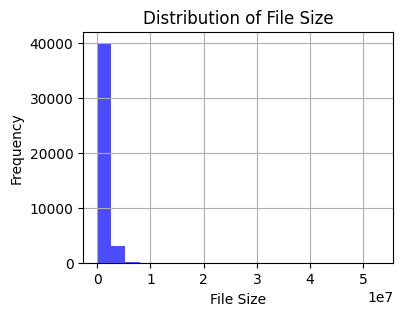

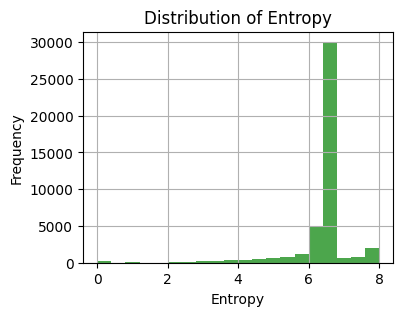

In [80]:
import matplotlib.pyplot as plt

# Plot the distribution of File Size
plt.figure(figsize=(4, 3))
plt.hist(dataset['File Size'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of File Size')
plt.xlabel('File Size')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot the distribution of Entropy
plt.figure(figsize=(4, 3))
plt.hist(dataset['Entropy'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of Entropy')
plt.xlabel('Entropy')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [49]:
dataset['Malware'].value_counts()

1    41568
0     1725
Name: Malware, dtype: int64

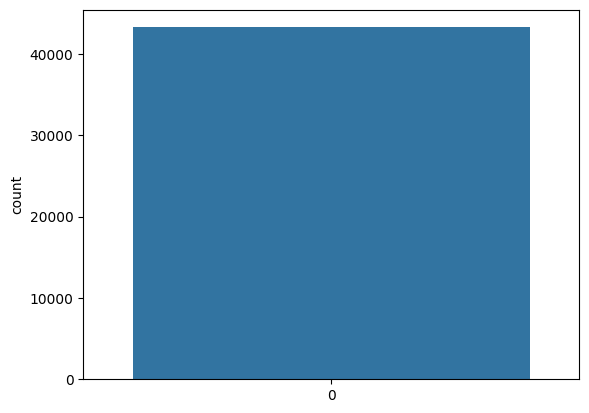

In [50]:
#Plot of Malware Columns where 0 is benign and 1 is malware
sns.countplot(dataset['Malware'])
plt.show()

In [51]:
x = dataset.drop(['Malware',"Hash"],axis=1)
y = dataset['Malware']

In [52]:
#splitting the dataset
from sklearn.metrics import f1_score
from sklearn.metrics import  recall_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [53]:
#kNN Classifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.1,random_state=2)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier()
kNN.fit(x_train,y_train)
y_pred = kNN.predict(x_test)

accuracy = accuracy_score(y_pred, y_test)
print(accuracy)
print(classification_report(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred,zero_division=1))

from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

0.9685912240184757
              precision    recall  f1-score   support

           0       0.60      0.36      0.45       155
           1       0.98      0.99      0.98      4175

    accuracy                           0.97      4330
   macro avg       0.79      0.68      0.72      4330
weighted avg       0.96      0.97      0.96      4330

F1 Score:  0.9838326200665716


0.9685912240184757
              precision    recall  f1-score   support

           0       0.60      0.36      0.45       155
           1       0.98      0.99      0.98      4175

    accuracy                           0.97      4330
   macro avg       0.79      0.68      0.72      4330
weighted avg       0.96      0.97      0.96      4330

F1 Score:  0.9838326200665716


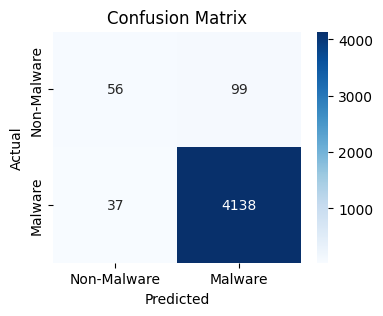

In [75]:
#kNN Classifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.1,random_state=2)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier(n_neighbors=5)
kNN.fit(x_train,y_train)
y_pred = kNN.predict(x_test)

knn_accuracy = accuracy_score(y_pred, y_test)
print(knn_accuracy)
print(classification_report(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred,zero_division=1))

from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

# Step 9: Visualize the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confmat, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Malware', 'Malware'], yticklabels=['Non-Malware', 'Malware'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

0.9658159140778381
              precision    recall  f1-score   support

           0       0.66      0.29      0.41       345
           1       0.97      0.99      0.98      8314

    accuracy                           0.97      8659
   macro avg       0.82      0.64      0.69      8659
weighted avg       0.96      0.97      0.96      8659

F1 Score:  0.9824019024970273


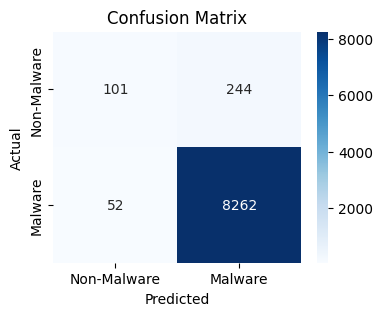

In [72]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=3)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

from xgboost import XGBClassifier
# Step 6: Train the XGBoost model
xgb_classifier = XGBClassifier()
xgb_classifier.fit(x_train, y_train)

# Step 7: Predict malware status for test data
y_pred = xgb_classifier.predict(x_test)

xgb_accuracy = accuracy_score(y_pred, y_test)
print(xgb_accuracy)
print(classification_report(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred,zero_division=1))

from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
# Step 9: Visualize the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confmat, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Malware', 'Malware'], yticklabels=['Non-Malware', 'Malware'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


0.9123455364360781
              precision    recall  f1-score   support

           0       0.03      0.04      0.04       345
           1       0.96      0.95      0.95      8314

    accuracy                           0.91      8659
   macro avg       0.50      0.49      0.49      8659
weighted avg       0.92      0.91      0.92      8659

F1 Score:  0.9540862621740971


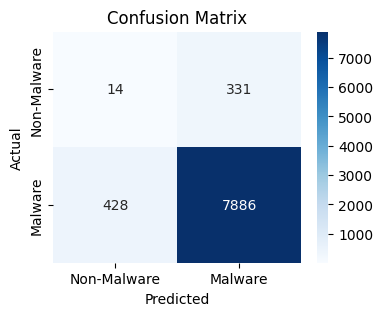

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=3)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Step 6: Train the Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

# Step 7: Predict malware status for test data
y_pred = nb_classifier.predict(x_test)


gnb_accuracy = accuracy_score(y_pred, y_test)
print(gnb_accuracy)
print(classification_report(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred,zero_division=1))

from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
# Step 9: Visualize the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confmat, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Malware', 'Malware'], yticklabels=['Non-Malware', 'Malware'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

0.9659314008546022
              precision    recall  f1-score   support

           0       0.62      0.37      0.46       345
           1       0.97      0.99      0.98      8314

    accuracy                           0.97      8659
   macro avg       0.80      0.68      0.72      8659
weighted avg       0.96      0.97      0.96      8659

F1 Score:  0.982405916383372


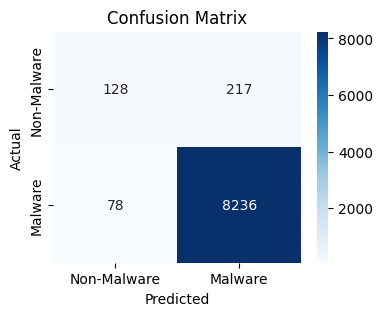

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=3)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Step 6: Train the Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)

# Step 7: Predict malware status for test data
y_pred = rf_classifier.predict(x_test)


rf_accuracy = accuracy_score(y_pred, y_test)
print(rf_accuracy)
print(classification_report(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred,zero_division=1))

from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
# Step 9: Visualize the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confmat, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Malware', 'Malware'], yticklabels=['Non-Malware', 'Malware'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Epoch 1/5 - Accuracy: 0.9667398082919506
Epoch 2/5 - Accuracy: 0.9667398082919506
Epoch 3/5 - Accuracy: 0.9667398082919506
Epoch 4/5 - Accuracy: 0.9667398082919506
Epoch 5/5 - Accuracy: 0.9667398082919506
0.9659314008546022
              precision    recall  f1-score   support

           0       0.62      0.37      0.46       345
           1       0.97      0.99      0.98      8314

    accuracy                           0.97      8659
   macro avg       0.80      0.68      0.72      8659
weighted avg       0.96      0.97      0.96      8659

F1 Score:  0.982405916383372


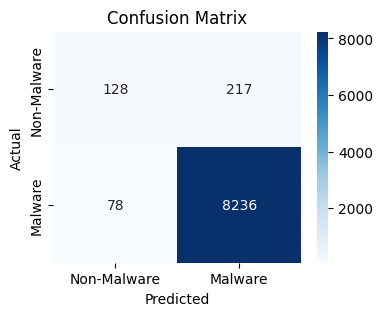

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=3)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Step 6: Train the Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Step 6: Train the model in multiple epochs
num_epochs = 5
for epoch in range(num_epochs):
    # Create and train the Random Forest model
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=3)
    rf_classifier.fit(x_train, y_train)

    # Predict malware status for test data
    y_pred = rf_classifier.predict(x_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Epoch {epoch+1}/{num_epochs} - Accuracy: {accuracy}")


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)

# Step 7: Predict malware status for test data
y_pred = rf_classifier.predict(x_test)


accuracy = accuracy_score(y_pred, y_test)
print(accuracy)
print(classification_report(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred,zero_division=1))

from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
# Step 9: Visualize the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confmat, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Malware', 'Malware'], yticklabels=['Non-Malware', 'Malware'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

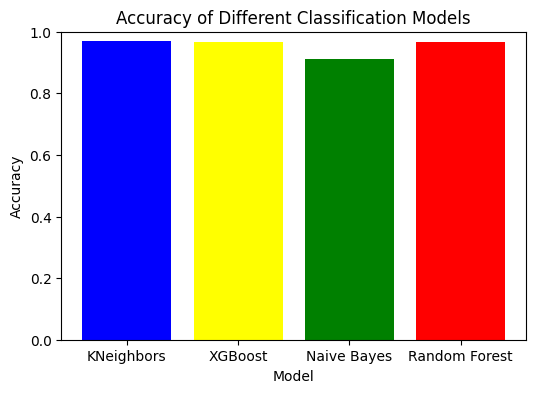

In [78]:
# Create a DataFrame to store accuracy results
accuracy_df = pd.DataFrame({
    'Model': ['KNeighbors','XGBoost','Naive Bayes', 'Random Forest'],
    'Accuracy': [knn_accuracy,xgb_accuracy, gnb_accuracy, rf_accuracy]
})

# Plot the accuracy results
plt.figure(figsize=(6, 4))
plt.bar(accuracy_df['Model'], accuracy_df['Accuracy'], color=['blue','yellow', 'green', 'red'])
plt.title('Accuracy of Different Classification Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

In [37]:
import os
import math
import hashlib

def file_size_entropy_and_hash(file_path):
    # Calculate file size
    file_size = os.path.getsize(file_path)

    # Calculate entropy
    with open(file_path, 'rb') as file:
        byte_freq = {}
        total_bytes = 0
        for byte in file.read():
            byte_freq[byte] = byte_freq.get(byte, 0) + 1
            total_bytes += 1

        entropy = 0
        for freq in byte_freq.values():
            probability = freq / total_bytes
            entropy -= probability * math.log2(probability)

    # Calculate hash value (MD5 for 32-character hash)
    hasher = hashlib.md5()
    with open(file_path, 'rb') as file:
        while True:
            chunk = file.read(4096)
            if not chunk:
                break
            hasher.update(chunk)
    hash_value = hasher.hexdigest()

    return file_size, entropy, hash_value

# Example usage:
file_path = "/Users/admin/11.SaskPoly/InnovationResearch/peheader/test/test_file.jpg"  # Change this to your file path
size, entropy, hash_value = file_size_entropy_and_hash(file_path)
print(f"File size: {size} bytes")
print(f"Entropy: {entropy}")
print(f"Hash value: {hash_value}")


File size: 813532 bytes
Entropy: 7.952006325781417
Hash value: 9d2548091bae3cb3c08c035d16d5c7a0


In [38]:
import os
import math
import hashlib
import csv

def file_size_entropy_and_hash(file_path):
    # Calculate file size
    file_size = os.path.getsize(file_path)

    # Calculate entropy
    with open(file_path, 'rb') as file:
        byte_freq = {}
        total_bytes = 0
        for byte in file.read():
            byte_freq[byte] = byte_freq.get(byte, 0) + 1
            total_bytes += 1

        entropy = 0
        for freq in byte_freq.values():
            probability = freq / total_bytes
            entropy -= probability * math.log2(probability)

    # Calculate hash value (MD5 for 32-character hash)
    hasher = hashlib.md5()
    with open(file_path, 'rb') as file:
        while True:
            chunk = file.read(4096)
            if not chunk:
                break
            hasher.update(chunk)
    hash_value = hasher.hexdigest()

    return hash_value, file_size, entropy

def create_file_info_csv(folder_path, csv_filename):
    with open(csv_filename, 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerow(['Hash', 'File Size', 'Entropy', 'Malware'])  # Write header

        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)
            if os.path.isfile(file_path):
                hash_value, file_size, entropy = file_size_entropy_and_hash(file_path)
                csv_writer.writerow([hash_value, file_size, entropy, ''])  # Add a placeholder for malware column

# Example usage:
folder_path = "/Users/admin/11.SaskPoly/InnovationResearch/peheader/test"  # Change this to your folder path
csv_filename = "predict.csv"
create_file_info_csv(folder_path, csv_filename)
print(f"CSV file '{csv_filename}' has been created with file information.")


CSV file 'predict.csv' has been created with file information.


In [40]:
import os
import math
import hashlib
import csv

def file_size_entropy_and_hash(file_path):
    # Calculate file size
    file_size = os.path.getsize(file_path)

    # Calculate entropy
    with open(file_path, 'rb') as file:
        byte_freq = {}
        total_bytes = 0
        for byte in file.read():
            byte_freq[byte] = byte_freq.get(byte, 0) + 1
            total_bytes += 1

        entropy = 0
        for freq in byte_freq.values():
            probability = freq / total_bytes
            entropy -= probability * math.log2(probability)

    # Calculate hash value (MD5 for 32-character hash)
    hasher = hashlib.md5()
    with open(file_path, 'rb') as file:
        while True:
            chunk = file.read(4096)
            if not chunk:
                break
            hasher.update(chunk)
    hash_value = hasher.hexdigest()

    return hash_value, file_size, entropy

def create_file_info_csv(folder_path, csv_filename):
    with open(csv_filename, 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerow(['File Name', 'Hash', 'File Size', 'Entropy', 'Malware'])  # Write header

        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)
            if os.path.isfile(file_path):
                hash_value, file_size, entropy = file_size_entropy_and_hash(file_path)
                csv_writer.writerow([filename, hash_value, file_size, entropy, ''])  # Add a placeholder for malware column

# Example usage:
folder_path = "/Users/admin/11.SaskPoly/InnovationResearch/peheader/test"  # Change this to your folder path
csv_filename = "predict.csv"
create_file_info_csv(folder_path, csv_filename)
print(f"CSV file '{csv_filename}' has been created with file information including file name.")


CSV file 'predict.csv' has been created with file information including file name.


In [82]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Read the file_info.csv file
data = pd.read_csv("/Users/admin/11.SaskPoly/InnovationResearch/peheader/predict.csv")

# Step 2: Preprocess the data if needed
# For this example, let's encode 'Malware' column to 0 for non-malware and 1 for malware
#data['Malware'] = data['Malware'].apply(lambda x: 1 if x == 'Malware' else 0)

# Step 3: Prepare features and scale them
X = data[['File Size', 'Entropy']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train the KNeighborsClassifier

#knn_classifier = KNeighborsClassifier(n_neighbors=5)
#knn_classifier.fit(X_scaled, data['Malware'])

# Step 5: Predict malware status
data['Malware'] = kNN.predict(X_scaled)

# Step 6: Write the results back to the CSV file
data.to_csv("file_info_predicted.csv", index=False)

print("Predictions saved to file_info_predicted.csv")


Predictions saved to file_info_predicted.csv
